<a href="https://colab.research.google.com/github/Ryukijano/Physics-Based-DeepLearning/blob/main/Copy_of_gaussian_splatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Splatting

Gaussian Splatting is a differentiable rasterization technique. It enables an ML-friendly representation of 3D.

Let's put it into practice with [LGM](https://huggingface.co/ashawkey/LGM).

## Setup

Install the required libraries.

In [1]:
!pip install -r https://huggingface.co/spaces/dylanebert/LGM-mini/raw/main/requirements.txt
!pip install https://huggingface.co/spaces/dylanebert/LGM-mini/resolve/main/wheel/diff_gaussian_rasterization-0.0.0-cp310-cp310-linux_x86_64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.6/694.6 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.0 MB/s 

# Pipeline

Create a multi-view diffusion pipeline, as in the previous notebook. This is the first step in LGM.

In [2]:
import torch
from diffusers import DiffusionPipeline

image_pipeline = DiffusionPipeline.from_pretrained(
    "dylanebert/multi-view-diffusion",
    custom_pipeline="dylanebert/multi-view-diffusion",
    torch_dtype=torch.float16,
    trust_remote_code=True,
).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

pipeline.py:   0%|          | 0.00/58.7k [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

unet/mv_unet.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by MVDreamPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Then, create an LGM pipeline. This model generates a splat given multi-view images, and is the main contribution of the [LGM](https://huggingface.co/ashawkey/LGM) research project.

In [3]:
splat_pipeline = DiffusionPipeline.from_pretrained(
    "dylanebert/LGM",
    custom_pipeline="dylanebert/LGM",
    torch_dtype=torch.float16,
    trust_remote_code=True,
).to("cuda")

model_index.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

pipeline.py:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

lgm/config.json:   0%|          | 0.00/61.0 [00:00<?, ?B/s]

lgm/lgm.py:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/830M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by LGMPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/1 [00:00<?, ?it/s]

/root/.cache/huggingface/modules/diffusers_modules/local/lgm.py:334: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")


Load the input image.

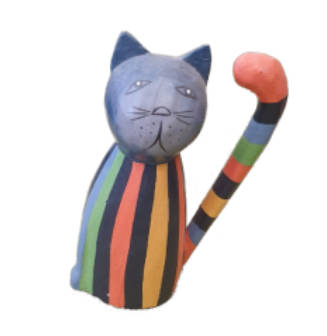

In [4]:
import requests
from PIL import Image
from io import BytesIO


image_url = "https://huggingface.co/datasets/dylanebert/3d-arena/resolve/main/inputs/images/cat_statue.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image

Finally, pass the image through both pipelines. The result with be a matrix of splat data, which can be saved with `splat_pipeline.save_ply`.

The output will be saved to `/tmp/output.ply`, then downloaded using colab utilities.

In [5]:
import numpy as np
from google.colab import files

input_image = np.array(image, dtype=np.float32) / 255.
multi_view_images = image_pipeline("", input_image, guidance_scale=5, num_inference_steps=30, elevation=0)
splat = splat_pipeline(multi_view_images)

output_path = "/tmp/output.ply"
splat_pipeline.save_ply(splat, output_path)
files.download(output_path)

  0%|          | 0/30 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Congratulations!

To view the `output.ply` splat file, upload it in a viewer like [gradio/model3D](https://huggingface.co/spaces/gradio/model3D).

Alternatively, for more advanced functionality (e.g. coordinate system correction, converting to `.splat`), upload it to an editor like [gsplat editor](https://huggingface.co/spaces/dylanebert/gsplat-editor) or [SuperSplat](https://playcanvas.com/supersplat/editor).

## Gradio Demo

In [6]:
import gradio as gr

def run(image):
    input_image = image.astype("float32") / 255.0
    images = image_pipeline("", input_image, guidance_scale=5, num_inference_steps=30, elevation=0)
    splat = splat_pipeline(images)
    output_path = "/tmp/output.ply"
    splat_pipeline.save_ply(splat, output_path)
    return output_path

demo = gr.Interface(fn=run, inputs="image", outputs=gr.Model3D())
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://51b6da8e5b5042cc02.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
